In [1]:
%matplotlib inline
import sys

import numpy as np
import pandas as pd
import pickle as pkl
import torch
import matplotlib.pyplot as plt                 
import matplotlib.ticker as tck

# From mapsr 
import mapsr
import schemes_dev as sc
import ami_fnn_method as afm
import pecuzal_method as pecuzal
import post_process_mapsr

from post_process_mapsr import pp_mapsr

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Load parameters of the MAPSR run

In [2]:
base_fld = 'Exp_Tara'
param_file = base_fld+"/Param.csv"

ppm = pp_mapsr(param_file=param_file)

In [3]:
data_files = ppm.get_data_files()
data_files

array(['/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt',
       '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt',
       '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/16.txt'],
      dtype='<U103')

# Compute average training loss over last $n$ iterations 

In [4]:
ppm.set_loss_average(n=100)
ppm.set_delay_details()

# Case name referes to individual data file and will appear in result table and further analysis 

In [5]:
case_names = ['Chaos', 'Intermittency', 'LCO']
ppm.set_case_names(case_names= case_names)
ppm.case_names

{'/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt': 'Chaos',
 '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt': 'Intermittency',
 '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/16.txt': 'LCO'}

# Set variable names for input time series (can be in latex format without \$ symbol)

In [6]:
var_names = ["p'"]
ppm.set_var_names(var_names=var_names)
ppm.var_names

["p'"]

# Plot MAPSR result

(0.0, 20000.0)

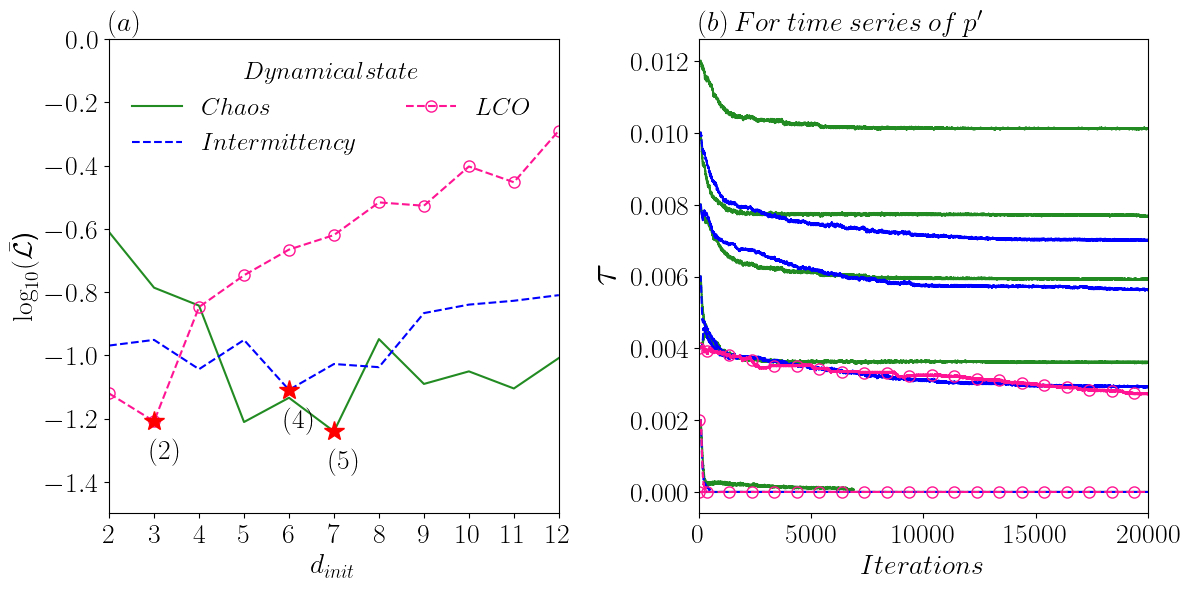

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=ppm.n_var)
axs = axs.reshape(ppm.n_var, 2)
fig.set_size_inches(12,6)
axs_loss, axs_delay = ppm.plot_mapsr_results(fig, axs, title_legend = 'Dynamical state', ncol_legend = 2)
axs_loss.set_ylim([-1.5,0])
axs_delay[0].set_xlim([0,20000])
axs_delay[0].set_xlim([0,20000])

# Create table for MAPSR

Here tab_mapsr is in latex format and tab_mapsr_pd is used for storing results and can be readily used for analysis. 

In [8]:
norm_fact = 1e2 # Delay values will be multiplied by this number
tab_mapsr, tab_mapsr_pd = ppm.create_table(norm_fact=norm_fact)

In [9]:
tab_mapsr

,Case,Method,Dimension,Delay ($\times10^{2}$)
0,Chaos,MAPSR,5,"p' : [0. , 0.3605, 0.5911, 0.7674, 1.0116]\n"
0,Intermittency,MAPSR,4,"p' : [0. , 0.2945, 0.5631, 0.7014]\n"
0,LCO,MAPSR,2,"p' : [0. , 0.2725]\n"


In [10]:
tab_mapsr_pd

,Case,Method,Dimension,Delay
0,Chaos,MAPSR,5,"[[0.0, 0.0036054275, 0.0059108566, 0.007673665..."
0,Intermittency,MAPSR,4,"[[0.0, 0.0029454245, 0.005630855, 0.0070136595]]"
0,LCO,MAPSR,2,"[[0.0, 0.0027254228]]"


# AMI-FNN

In [11]:
pp_ami_fnn = afm.ami_fnn_analysis(param_file, ppm.var_names, ppm.case_names)
pp_ami_fnn.sampling_time

MAPSR analysis is performed with time series: [1]
Name of time series: ["p'"]


0.00010013580322265625

In [12]:
sampling_time = 1e-4
pp_ami_fnn.change_sampling_time(sampling_time=sampling_time)

In [13]:
ppm.get_time_series_index()

'[1]'

In [14]:
time_series_id = 0
pp_ami_fnn.set_time_series_id(time_series_id)

The AMI-FNN will be performed for variable: p'


0

In [15]:
ami_fnn_compute = False
ami_fnn_save = True

ami_fnn_file = 'AMI_FNN_Experiment.pkl'

In [16]:
if ami_fnn_compute:
    pp_ami_fnn.get_ami_fnn(n_bins_div = 1, fnn_th_per = 1 )
    if ami_fnn_save:
        with open(base_fld+'/'+ ami_fnn_file,'wb') as f:
            pkl.dump(pp_ami_fnn, f)  
else:
    with open(base_fld+'/'+ ami_fnn_file,'rb') as f:
        pp_ami_fnn = pkl.load(f)

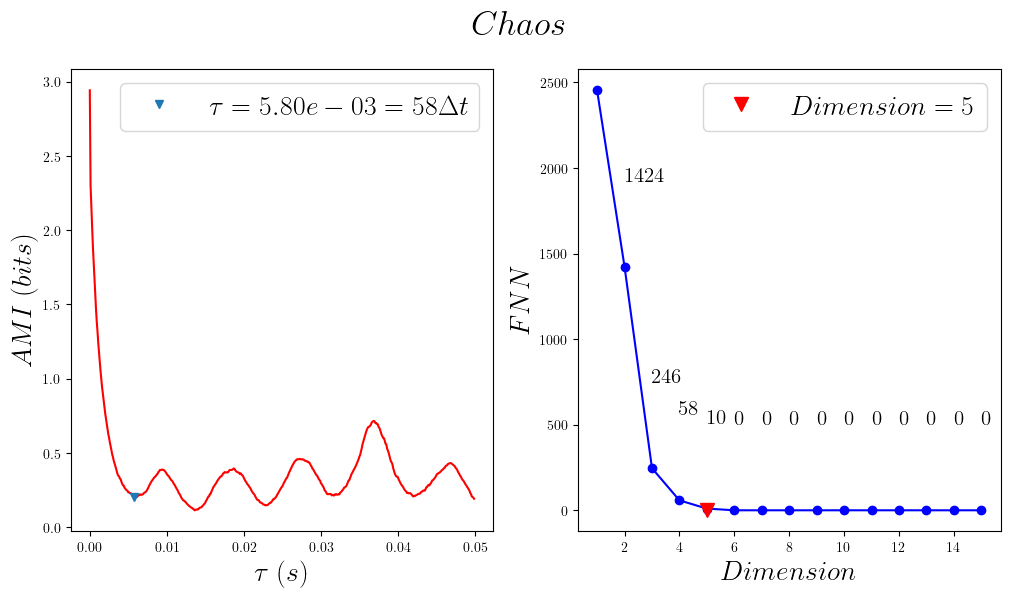

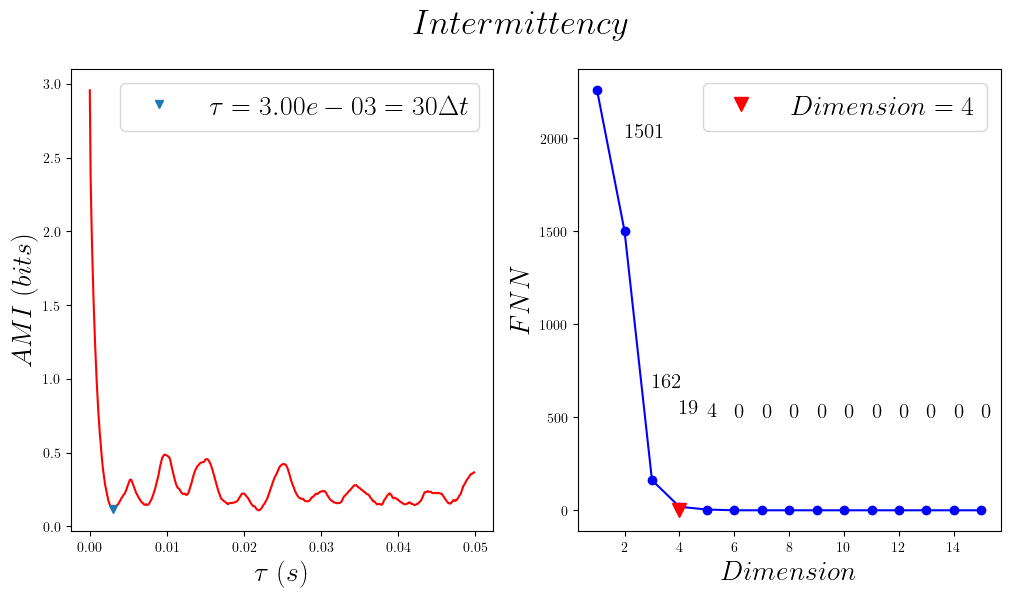

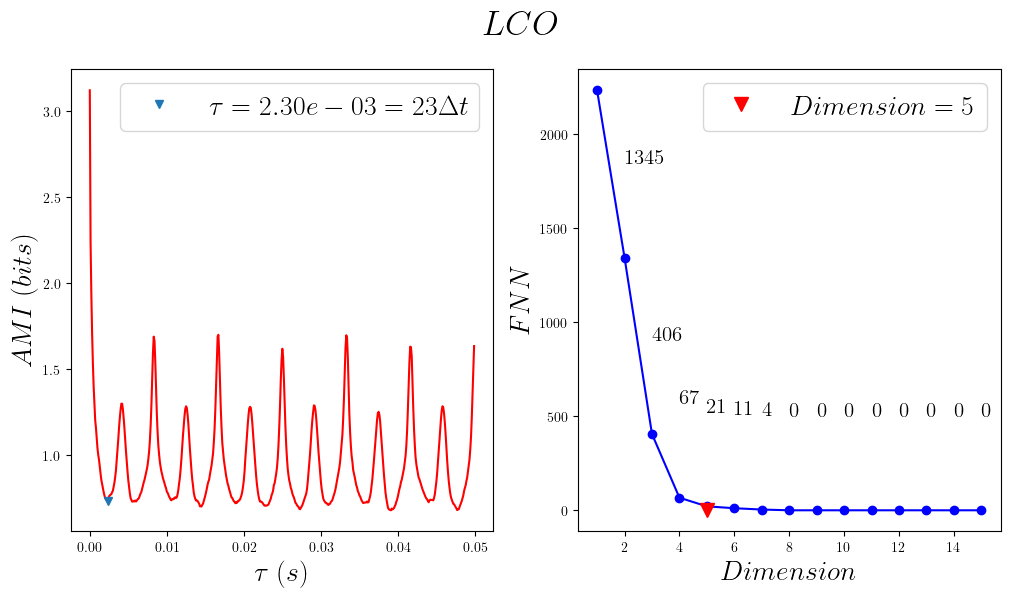

In [17]:
pp_ami_fnn.plot_ami_fnn(folder = base_fld, save=True)

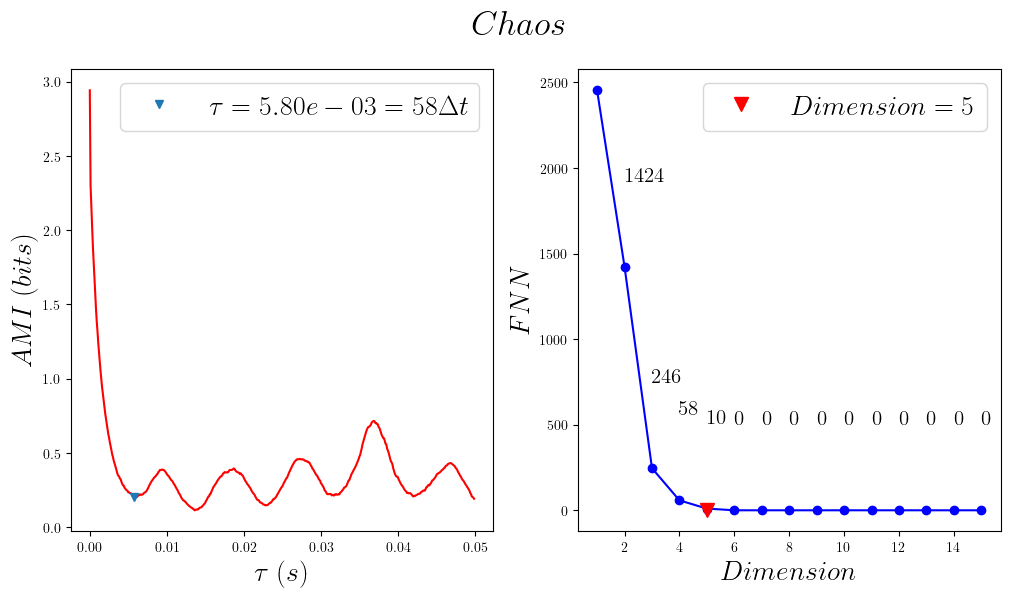

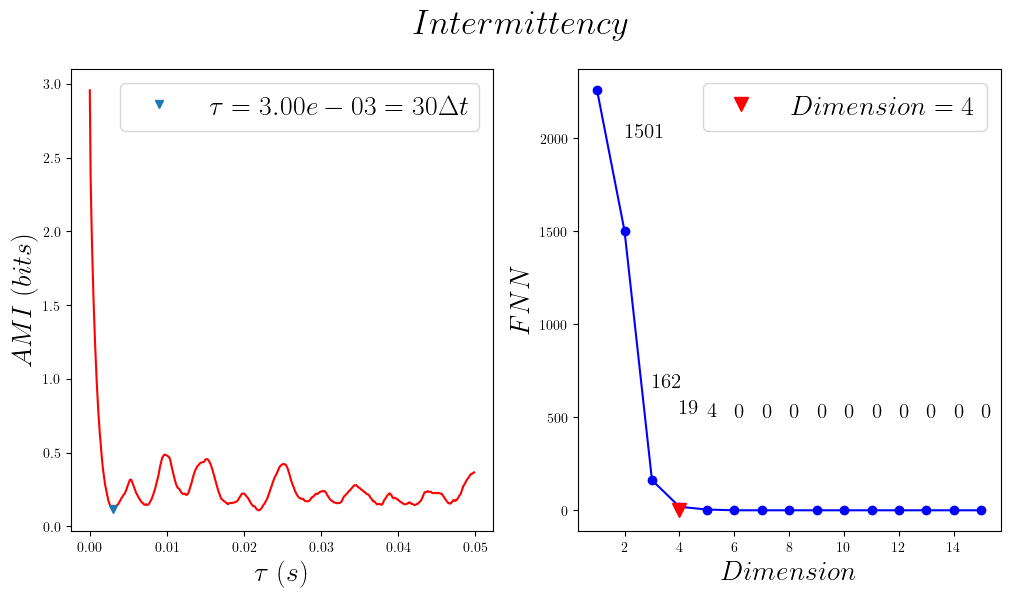

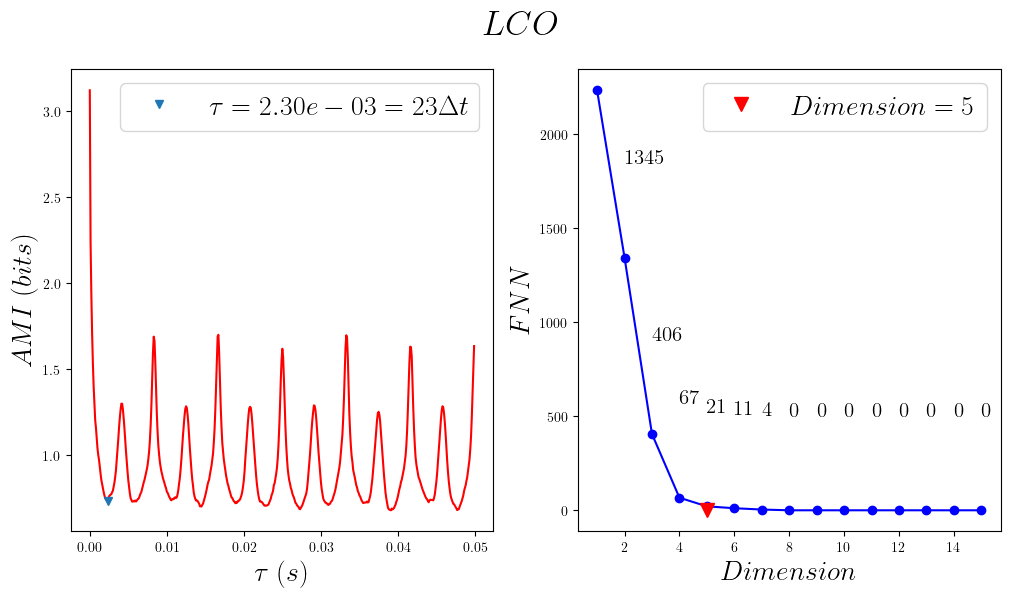

In [18]:
pp_ami_fnn.plot_ami_fnn(folder = base_fld, save=True)

# Create table for AMI-FNN method

In [19]:
tab_ami_fnn = pp_ami_fnn.create_table(ppm.case_names, norm_fact)
tab_ami_fnn

,Case,Method,Dimension,Delay ($\times10^{2}$)
0,Chaos,AMI-FNN,5,"p' : [0. , 0.58, 1.16, 1.74, 2.32]\n"
0,Intermittency,AMI-FNN,4,"p' : [0. , 0.3, 0.6, 0.9]\n"
0,LCO,AMI-FNN,5,"p' : [0. , 0.23, 0.46, 0.69, 0.92]\n"


# PECUZAL method
The results for PECUZAL are computed using matlab and are only uploaded here. The result of PECUZAL are stored in a format suitable to club them with the MAPSR and AMI-FNN results.

In [20]:
pecuzal_csv = 'Other_Methods/PECUZAL_results/PECUZAL_exp_uni_3000.csv'

In [21]:
tab_pecuzal = pecuzal.create_table(param_file, pecuzal_csv, ppm.n_var, ppm.var_names, norm_fact)
tab_pecuzal

,Case,Method,Dimension,Delay ($\times10^{2}$)
0,Chaos,PECUZAL,5,"p' : [0. , 0.29, 0.14, 0.22, 0.07]\n"
1,Intermittency,PECUZAL,3,"p' : [0. , 0.25, 0.13]\n"
2,LCO,PECUZAL,4,"p' : [0. , 0.21, 0.11, 0.32]\n"


# Club results from AMI-FNN, MAPSR, and PECUZAL methods 

In [22]:
table = pd.concat((tab_mapsr, tab_ami_fnn, tab_pecuzal))
table

,Case,Method,Dimension,Delay ($\times10^{2}$)
0,Chaos,MAPSR,5,"p' : [0. , 0.3605, 0.5911, 0.7674, 1.0116]\n"
0,Intermittency,MAPSR,4,"p' : [0. , 0.2945, 0.5631, 0.7014]\n"
0,LCO,MAPSR,2,"p' : [0. , 0.2725]\n"
0,Chaos,AMI-FNN,5,"p' : [0. , 0.58, 1.16, 1.74, 2.32]\n"
0,Intermittency,AMI-FNN,4,"p' : [0. , 0.3, 0.6, 0.9]\n"
0,LCO,AMI-FNN,5,"p' : [0. , 0.23, 0.46, 0.69, 0.92]\n"
0,Chaos,PECUZAL,5,"p' : [0. , 0.29, 0.14, 0.22, 0.07]\n"
1,Intermittency,PECUZAL,3,"p' : [0. , 0.25, 0.13]\n"
2,LCO,PECUZAL,4,"p' : [0. , 0.21, 0.11, 0.32]\n"


# Pivot the table and save it in csv and latex files

In [23]:
table = table.reset_index().drop('index', axis=1)

# Pivot
table_save = pd.pivot_table(table, index = table.columns.to_list())

# Save
table_save.to_csv(base_fld+'/table.csv')
table_save.style.to_latex(base_fld+'/table.tex')
table_save

Empty DataFrame
Columns: []
Index: [(Chaos, AMI-FNN, 5, p' : [0.  , 0.58, 1.16, 1.74, 2.32]
), (Chaos, MAPSR, 5, p' : [0.    , 0.3605, 0.5911, 0.7674, 1.0116]
), (Chaos, PECUZAL, 5, p' : [0.  , 0.29, 0.14, 0.22, 0.07]
), (Intermittency, AMI-FNN, 4, p' : [0. , 0.3, 0.6, 0.9]
), (Intermittency, MAPSR, 4, p' : [0.    , 0.2945, 0.5631, 0.7014]
), (Intermittency, PECUZAL, 3, p' : [0.  , 0.25, 0.13]
), (LCO, AMI-FNN, 5, p' : [0.  , 0.23, 0.46, 0.69, 0.92]
), (LCO, MAPSR, 2, p' : [0.    , 0.2725]
), (LCO, PECUZAL, 4, p' : [0.  , 0.21, 0.11, 0.32]
)]

# Phase space 

In [24]:
import os
param_df = ppm.param_df
catagory = ppm.loss_average
catagory_keys = catagory.keys()
data_files = ppm.get_data_files()

In [25]:
idx_arr = ppm.get_min_loss_idx()

kk= 1
Exp_Tara/exp_2_D7
torch.Size([50, 60, 5])
3d
kk= 2
Exp_Tara/exp_8_D6
torch.Size([50, 60, 4])
3d
kk= 3
Exp_Tara/exp_16_D3
torch.Size([50, 60, 2])
2d


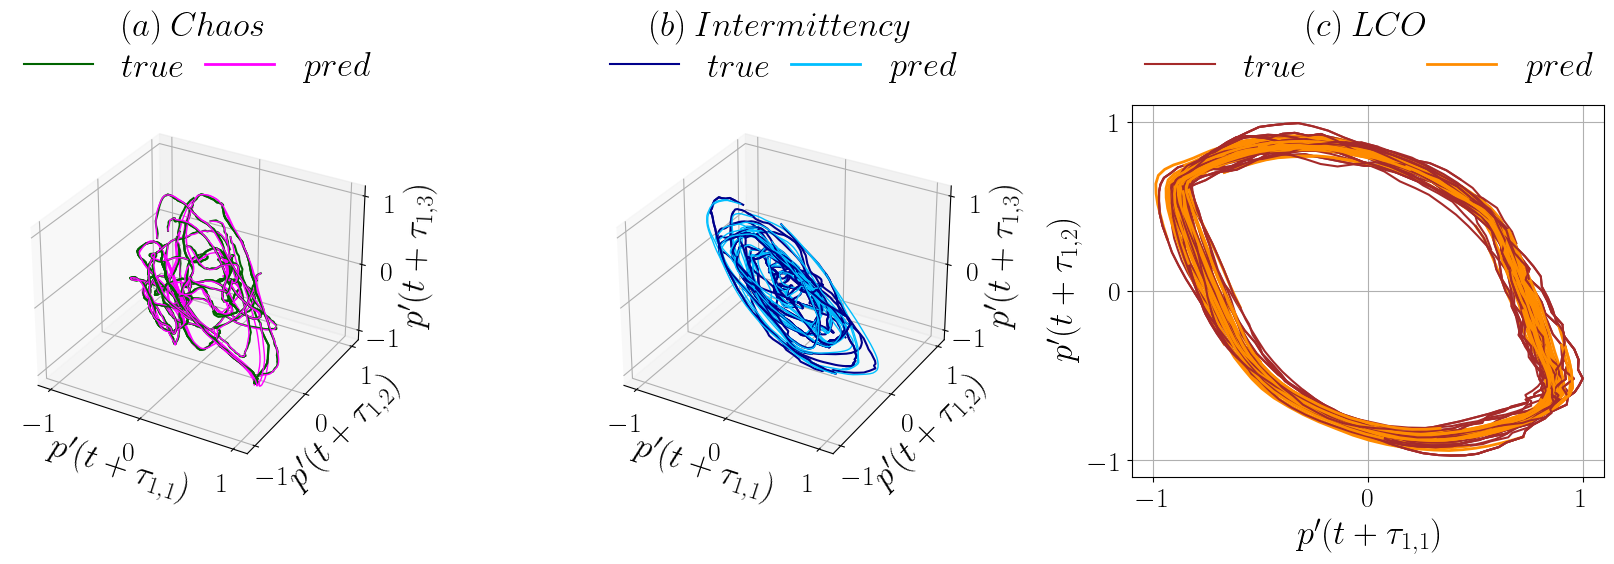

In [26]:
fig = plt.figure(figsize=(17,6))

color_1 = ['darkgreen', 'darkblue'   , 'brown']
color_2 = ['magenta'  , 'deepskyblue', 'darkorange']


delay_id = [[(0,0), (0,1), (0,2)],  # Here, (i,j) represents \tau_{i,j}, i.e. j^{th} delay for i^{th} time series 
            [(0,0), (0,1), (0,2)], 
            [(0,0), (0,1)]]

post_process_mapsr.plot_attractor(  fig        = fig, 
                                    n_row      = 1, 
                                    n_col      = 3, 
                                    data_files = ppm.get_data_files(), 
                                    param_df   = ppm.param_df, 
                                    idx_arr    = idx_arr, 
                                    case_names = ppm.case_names,
                                    var_names  = ppm.var_names, 
                                    color_true = color_1, 
                                    color_pred = color_2, 
                                    delay_id   = delay_id, 
                                    iter_plot  = 20000,  
                                    tab_sup    = tab_mapsr_pd)

fig.savefig(base_fld+'/attractor_exp.pdf')

# Comparison with Lyapunov time scale

Refer these data_files for creating data_files_lyapunov.

In [27]:
data_files

array(['/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt',
       '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt',
       '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/16.txt'],
      dtype='<U103')

In [28]:
param_df = ppm.param_df
tab_sup = tab_mapsr_pd
tab_sup


,Case,Method,Dimension,Delay
0,Chaos,MAPSR,5,"[[0.0, 0.0036054275, 0.0059108566, 0.007673665..."
0,Intermittency,MAPSR,4,"[[0.0, 0.0029454245, 0.005630855, 0.0070136595]]"
0,LCO,MAPSR,2,"[[0.0, 0.0027254228]]"


In [29]:
data_files_lyapunov = data_files[[0,1]]
tab_rows = [0,1]
lyapunov_exponents = np.array([171.5161,  130.9287])  # Obtained from matlab
T_ly = 1/ lyapunov_exponents

In [30]:
case_names_lyapunov = post_process_mapsr.get_selective_case_names(ppm.case_names, data_files_lyapunov)
case_names_lyapunov

{'/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt': 'Chaos',
 '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt': 'Intermittency'}

In [31]:

batch_time_mul = 20
z_true_batch, z_pred_batch, loss_batch, loss_batch_avg, t_batch, diameter = post_process_mapsr.get_loss_evolution_in_time(param_df, 
                                                                                                                        tab_mapsr_pd, 
                                                                                                                        idx_arr, 
                                                                                                                        data_files_lyapunov, 
                                                                                                                        T_ly, 
                                                                                                                        ppm.var_names, 
                                                                                                                        tab_rows, 
                                                                                                                        batch_time_mul)

folder:  Exp_Tara/exp_2_D7
data_file:  /mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt
folder:  Exp_Tara/exp_8_D6
data_file:  /mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


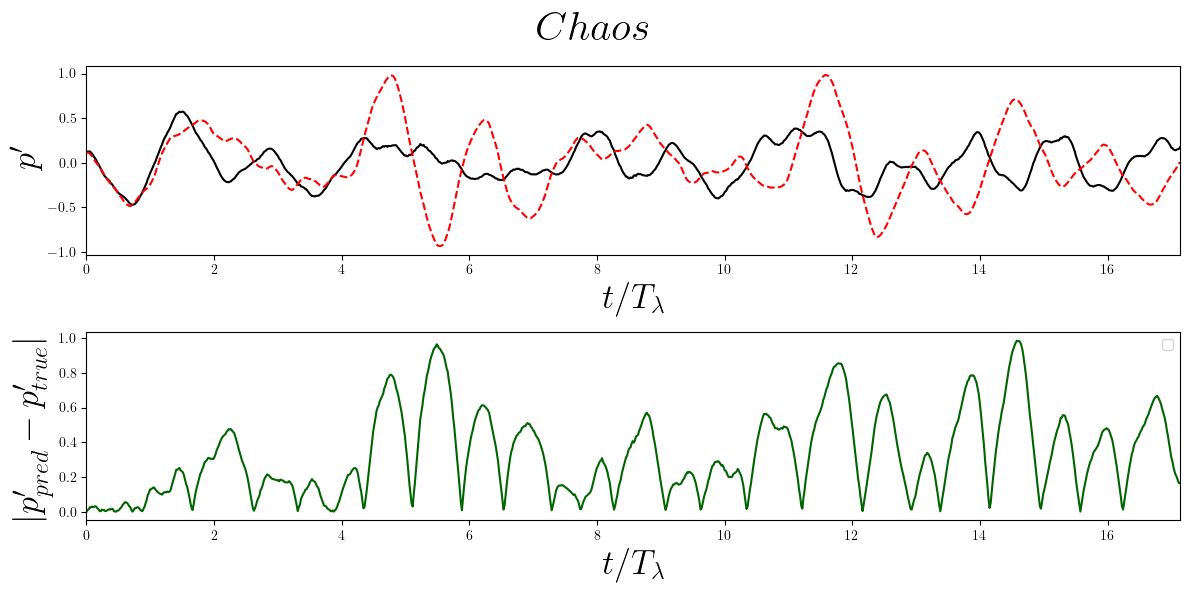

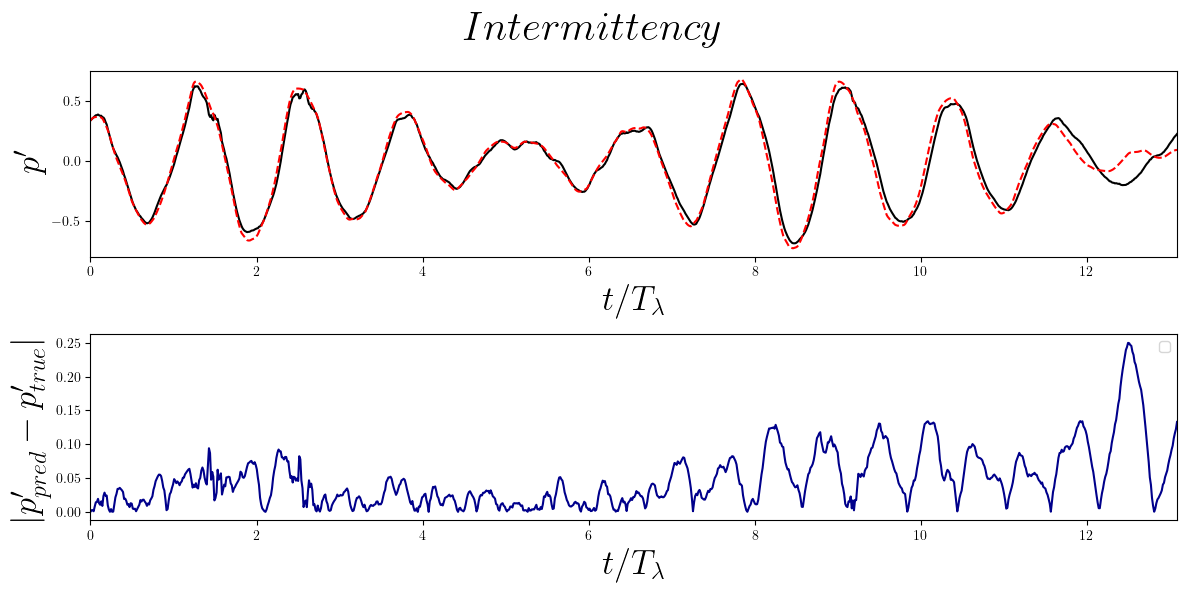

In [32]:
figsize = [12,6]
post_process_mapsr.plot_loss_evolution( figsize, 
                                        case_names_lyapunov, 
                                        data_files_lyapunov, 
                                        z_true_batch, 
                                        z_pred_batch, 
                                        loss_batch, 
                                        t_batch, 
                                        id_in=0, 
                                        color=color_1,
                                        output_fld = base_fld)

In [33]:
case_names_lyapunov

{'/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt': 'Chaos',
 '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt': 'Intermittency'}

In [34]:
data_files_lyapunov

array(['/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/2.txt',
       '/mnt/storage0/jayesh/Work/Jayesh/Work/0_Experimental_Data/Turbulent_Combustor_Vishnu_JFM/28_SLPM/8.txt'],
      dtype='<U103')

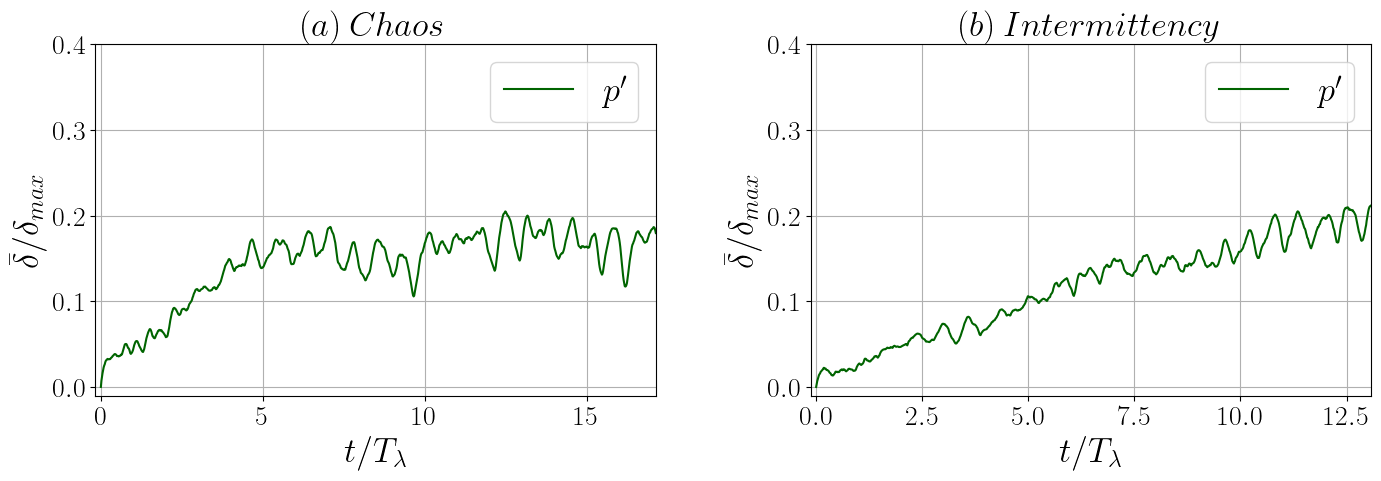

In [35]:
color = ['darkgreen','magenta']
y_lim = [-0.01,0.4]
figsize = [15,6]
fig = plt.figure(figsize= figsize)
post_process_mapsr.plot_loss_evolution_average(fig, 
                                               n_row = 1,
                                               n_col = 2,
                                               case_names = ppm.case_names, 
                                               data_files_in = data_files_lyapunov, 
                                               loss_avg_in = loss_batch_avg, 
                                               t_in = t_batch, 
                                               diameter = diameter, 
                                               color = color, 
                                               ylim = y_lim,
                                               output_fld = base_fld)

# Make video

Makes video of phase space during training.

In [36]:
import os
import io
import gc
import PIL.Image as Image
import moviepy.video.io.ImageSequenceClip as movie_maker
fps=5

In [37]:
def plot_cmp(fig, title, kk, tt,zt, tp,zp, τ, dpi = 300):
    cpu = torch.device('cpu')

    right = 0.6
    top   = 0.8
    
    fig.clf()
    fig.suptitle(title, fontsize=25)
    if zt.shape[2]==1:
        axs_arr = fig.add_subplot(1,1,1)
        for p_id in range(zt.shape[2]-1):
            axs_arr.plot(zt[:, p_id, 0].to(cpu).detach().numpy(),'k-')
            axs_arr.plot(zp[:, p_id, 0].to(cpu).detach().numpy(),'r--', linewidth=2)
            axs_arr.set_ylabel('$x(t)$',fontsize=20)
        axs_arr.set_xlabel('$t_{id}$',fontsize=20)
        # text = '$\\tau_'+str(0)+'='+ "{:.4f}".format(τ[0]) +'$'
        # axs_arr.set_title(text,fontsize=20)

    else:
        axs_arr = [fig.add_subplot(zt.shape[2]-1,1,i+1) for i in range(zt.shape[2]-1)] 
        axs_arr[0].set_title(title, fontsize=25)
        for i in range(zt.shape[2]-1):
            for p_id in range(zp.shape[1]):
                axs_arr[i].plot(zt[:, p_id, 0].to(cpu).detach().numpy(), zt[:, p_id, i+1].to(cpu).detach().numpy(),'k-')
                axs_arr[i].plot(zp[:, p_id, 0].to(cpu).detach().numpy(), zp[:, p_id, i+1].to(cpu).detach().numpy(),'r--', linewidth=2)    
                axs_arr[i].set_ylabel('$x(t+\\tau_'+str(i+1)+'$)',fontsize=20)
        
        axs_arr[i].set_xlabel('x(t)',fontsize=20)
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.4,
                        hspace=0.4) 
    
    #========== convert fig to bitstream and convert to numpy array 
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png', dpi = dpi)
    buffer.seek(0)
    im = Image.open(buffer)
    im_np = np.asarray(im)
    #im.show()
    buffer.close()
    return im_np

        

In [38]:
fig = []
img_np = []
img_data = []

While creating video it may take more memory. Ideally we want to create video fo all cases, i.e. range(len(param_df)). Due to memory constraints instrad of creating videos for all cases at a time create video for small number of cases.

Exp_Tara/exp_8_D3
Exp_Tara/exp_8_D3/video.avi
Moviepy - Building video ./Exp_Tara/exp_8_D3/video.mp4.
Moviepy - Writing video ./Exp_Tara/exp_8_D3/video.mp4



Moviepy - Done !
Moviepy - video ready ./Exp_Tara/exp_8_D3/video.mp4


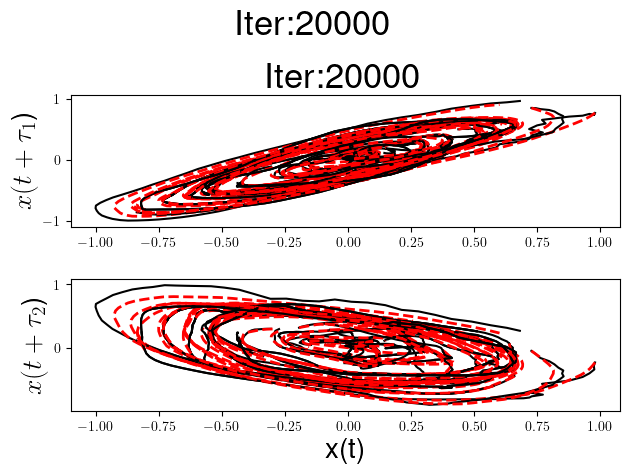

In [39]:
for i in range(12,13):#len(param_df)):
    
    args_all = ppm.args_all
    folder = args_all[i].folder
    print(folder)
    print(folder+'/video.avi')
    img_arr = []
    fig = plt.figure()
    
    for j in range(0,args_all[i].niters,args_all[i].test_freq):
        img_pkl = './'+folder+'/comp_pred_'+str(j)+'.pkl'
        if os.path.exists(img_pkl):
            
            with open(img_pkl,'rb') as fl:
                img_data = pkl.load(fl)
            
            img_np = plot_cmp(fig, title=img_data[0], 
                                   kk   =img_data[1], 
                                   tt   =img_data[2],
                                   zt   =img_data[3], 
                                   tp   =img_data[4],
                                   zp   =img_data[5], 
                                   τ    =img_data[6])                        
            
            img_arr.append(img_np)
    step = 1
    clip = movie_maker.ImageSequenceClip(img_arr[0::step], fps=fps)
    clip.write_videofile('./'+folder+'/video.mp4')
    
    gc.collect()
